2.1 신경망과의 첫 만남

In [ ]:
# 케라스에서 mnist 데이터셋 적재하기
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# 훈련 세트
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# 테스트 세트
test_images.shape



(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
# 신경망 구조
from keras import models
from keras import layers

network = models.Sequential()
# print(network)
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [ ]:
print(network.add(layers.Dense(512, activation='relu', input_shape=(28*28,))))
print(network.add(layers.Dense(10, activation='softmax')))

None
None


신경망 층인 Dense 층 2개가 연속, 두번째층은 10개의 확률 점수가 들어 있는 배열(모두 더하면 1)을 반환하는 소프트맥스층이다. 각 점수는 현재 숫자 이미지가 10개의 숫자 클래스중 하나에 속할 확률

신경망이 훈련준비를 마치기 위해 컴파일 단계에 3가지가 더 필요

1. 손실함수(loss function): 훈련데이터에서 신경망의 성능을 측정하는 방법으로 네트워크가 옳은 방향으로 학습될 수 있도록 도와줌
2. 옵티마이저(optimizer): 입력된 데이터와 손실 함수를 기반으로 네트워크를 업데이트하는 메커니즘
3. 훈련과 테스트 과정을 모니터링할 지표: 여기에서는 정확도(정확히 분류된 이미지의 비율)만 고려

In [ ]:
# 컴파일 단계
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print(network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']))

None


훈련 시작전 테이터를 네트워크에 맞는 크기로 바꾸고 모든 값을 0과 1사이로 스케일을 조정
그렇기에 앞서 훈련이미지는 [0, 255] 사이의 값인 uint8 타입의 (60000, 28, 28) 크기를 가진 배열로 저장되어 있다. 이 데이터를 0과 1사이의 값을 가지는 float32타입의 (60000, 28, 28) 크기인 배열로 바꿈

In [ ]:
# 이미지 데이터 준비하기
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [ ]:
# 레이블 준비하기
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 1.0873 - accuracy: 0.6350
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1496 - accuracy: 0.9592
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0898 - accuracy: 0.9758
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0570 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0462 - accuracy: 0.9873


위에 있는 정보는 훈련데이터에 대한 네트워크의 손실과 정확도이다.

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0961 - accuracy: 0.9760


In [ ]:
print('test_acc:', test_acc)

test_acc: 0.9760000109672546


테스트 정확도는 97.8% 정도로 나왔는데 훈현세트의 정확도 보다는 약간 낮습니다. 훈련 정확도와 테스트 정확도 사이의 차이는 과대적합(overfitting) 때문이다. 이는 머신 러닝 모델이 훈현 데이터보다 새로운 데이터에서 성능이 낮아지는 경향을 말한다.

2.2 신경망을 위한 데이터 표현

2.2.1 스칼라(0D 텐서)

하나의 숫자만 담고 있는 텐서를 스칼라(scalar)(또는 스칼라 텐서, 0차원텐서, 0D 텐서)라고 부른다. float32나ㅣ float64 타입의 숫자가 스칼라 텐서. 스칼라아 텐서의 축 개수는 0(ndim == 0). 텐서의 축 개수를 랭크라고도 부름

In [ ]:
import numpy as np
x = np.array(12)
x

array(12)

In [ ]:
x.ndim

0

2.2.2 벡터(1D 텐서)

숫자의 배열을 벡터(vector)또는 1D 텐서라고 부른다. 딱 하나의 축을 가진다.

In [ ]:
x= np.array([12, 2, 5, 6, 16])
x

array([12,  2,  5,  6, 16])

In [ ]:
x.ndim

1

이 벡터는 5개의 원소를 가지고 있어서 5차원 벡터라 부른다. 5D 벡터와 5D 텐서를 혼동하면 안된다. 5D 벡터는 하나의 축을 따라 5개의 차원을 가진것이고 5D 텐서는 5개의 축을 가진것이다.(

2.2.3 행렬(2D 텐서)

벡터의 배열이 행렬(matrix) 또는 2D 텐서. 행렬에는 2개의 축이 있다(행과 열)

In [ ]:
x = np.array([[5, 12, 4, 34, 6],
              [1, 23, 6, 45, 2],
              [7, 65, 9,12, 5]])
x

array([[ 5, 12,  4, 34,  6],
       [ 1, 23,  6, 45,  2],
       [ 7, 65,  9, 12,  5]])

In [ ]:
x.ndim

2

첫 번째 축에 놓여있는 원소를 행, 두번째 축에 놓여있는 원소를 열.

x의 첫번째 행은 [5, 12, 4, 34, 6]

첫번째 열은 [5, 1, 7]

2.2.4 3D 텐서와 고차원 텐서

3D 텐서: 행렬들을 하나의 새로운 배열로 합치면 숫자가 채워진 직육면체 형태로 해석됨

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 35, 1]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 35,  1]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

In [ ]:
x.ndim

3

3D 텐서들을 하나의 배열로 합치면 4D 텐서를 만드는 식으로 이어짐. 딥러닝에서는 보통 0D에서 4D 까지의 텐서를 다룸. 동영상 데이터의 경우 5D 텐서까지도 가기도함

2.2.5 핵심 속성

텐서는 3개의 핵심 속성으로 정의됨

1. 축의 개수(랭크) : 3D 텐서에는 3개의 축이 있고 2D 텐서(행렬)에는 2개의 축이 있다. ndim 속성에 저장되어 있음

2. 크기(shape) : 텐서의 각 축을 따라 얼마나 많은 차원이 있는지를 나타낸 파이썬의 튜플임. 위에서 했던 행렬의 크기는 (3, 5)이고 3D 텐서는 (3, 3, 5)이다.
 백터의 크기는 (5,)처럼 1개의 원소로 이루어진 튜플이다. 배열 스칼라는 ()처럼 크기가 없다

3. 데이터 타입(numpy에서는 dtype에 저장됨) : 텐서에 포함된 데이터의 타입

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
# train_images 배열의 ndim속성으로 축의 개수 확인
print(train_images.ndim)

3


In [ ]:
# 배열의 크기
print(train_images.shape)

(60000, 28, 28)


In [ ]:
# 데이터 타입확인
print(train_images.dtype)

uint8


위의 배열은 8비트 정수형 3D 텐서이다. 더 정확하게는 28 * 28 크기의 정수 행렬 6만개가 있는 배열. 각 행렬은 하나의 흑백 이미지고, 행렬의 각 원소는 0에서 255 사의 값을 가진다.

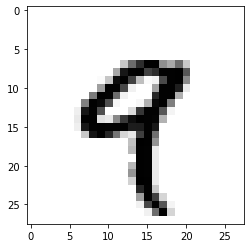

In [ ]:
# 다섯번째 이미지 출력하기
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

2.2.6 넘파이로 텐서 조작하기

train_images[i] 처럼 특정 원소를 선택하는 것을 슬라이싱

In [ ]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [ ]:
my_slice = train_images[10:100, :, :]  # 이전 예와 동일
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, 0:28, 0:28]  # 이전 예와 동일
my_slice.shape

(90, 28, 28)

In [ ]:
# 이미지의 오른쪽 아래 14*14픽셀을 선택
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

In [ ]:
# 정중앙에 위치한 14*14 픽셀을 선택
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)